## El siguiente cuarderno contempla el proyecto de predicción de ventas del proyecto del bootcamp de unilever

## Descripción de cada columnas

* **Item_Identifier:**: ID unico del producto
* **Item_Weight:** Peso del productp
* **Item_Fat_Content:** Si el producto es bajo en grasa o no
* **Item_Visibility:** Porcentaje del area de exhibición total de todos los produtos
* **Item_Type:** Categoria del producto
* **Item_MRP:** Precio de venta maximo del producto
* **Outlet_Identifier:** ID tienda unico
* **Outlet_Establishment_Year:** Año de la tienda
* **Outlet_Size:** Tamaño de la tienda
* **Outlet_Location_Type:** Tipo de ciudad en la que se encuentra
* **Outlet_Type:** Dos variable, type 1 es solo comestible y type 2 es algun tipo de supermercado
* **Item_Outlet_Sales:** Ventas del producto


## Importación de libreria

In [754]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import sys

print ("Pandas", pd.__version__)
print ("Numpy", np.__version__)
print ("sbn", sbn.__version__)
print ("Python", sys.version[:6])

Pandas 1.3.4
Numpy 1.20.3
sbn 0.11.2
Python 3.9.7 


## Carga de la data

In [755]:
df=pd.read_csv("C:/Users/crist/Python_jupiter/Bootcamp_python//Semana_2/sales_predictions.csv")
print ("El archivo tiene",df.shape[0],"filas, y ",df.shape[1],"columnas")
df2=df ## Copia del archivo
df.head(5)

El archivo tiene 8523 filas, y  12 columnas


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Parte 1: Pre- tratamiento de los datos

## 1.1 Información de las columnas

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 1.2 Descripción de las variables numericas

In [757]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [758]:
df.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


## 1.3 Verificación de los valores nulos

In [759]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 1.3 Analizo el comportamiento de las variables con valores nulos

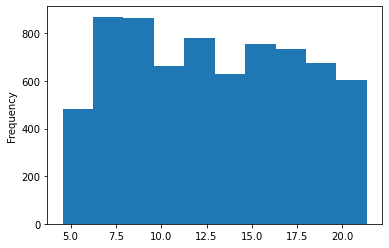

In [760]:
df["Item_Weight"].plot.hist();

## 1.5 Analizo la variable categorica con valores nulos 

In [761]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## 1.6 Transformo de variable categorica a numerica

In [762]:
df["Outlet_Size2"]=""
df["Outlet_Size2"][df["Outlet_Size"]=="Small"]=1;
df["Outlet_Size2"][df["Outlet_Size"]=="Medium"]=2;
df["Outlet_Size2"][df["Outlet_Size"]=="High"]=3;

C:\Users\crist\AppData\Local\Temp/ipykernel_11412/781719540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size2"][df["Outlet_Size"]=="Small"]=1;
C:\Users\crist\AppData\Local\Temp/ipykernel_11412/781719540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size2"][df["Outlet_Size"]=="Medium"]=2;
C:\Users\crist\AppData\Local\Temp/ipykernel_11412/781719540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

### 1.7  Inspecciono si hay alguna relación con otra columnas y elimino los nulos

**CONCLUSIÓN**  
**No hay ninguna relación clara, a traves de correlación metodo pearson**

In [763]:
df_sinnulos=df.dropna()#.corr()
df_sinnulos["Outlet_Size2"]=df_sinnulos["Outlet_Size2"].astype(int)
df_sinnulos.corr()  

C:\Users\crist\AppData\Local\Temp/ipykernel_11412/3585537563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinnulos["Outlet_Size2"]=df_sinnulos["Outlet_Size2"].astype(int)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size2
Item_Weight,1.000000,-0.010229,0.033330,-0.010596,0.010972,0.011948
Item_Visibility,-0.010229,1.000000,-0.007292,0.009324,-0.009644,-0.006419
Item_MRP,0.033330,-0.007292,1.000000,0.004105,0.679594,-0.008723
Outlet_Establishment_Year,-0.010596,0.009324,0.004105,1.000000,-0.040869,-0.536393
Item_Outlet_Sales,0.010972,-0.009644,0.679594,-0.040869,1.000000,-0.025965
Outlet_Size2,0.011948,-0.006419,-0.008723,-0.536393,-0.025965,1.000000


In [764]:
pd.DataFrame(df_sinnulos.corr()["Outlet_Size2"]).sort_values("Outlet_Size2", ascending=False).iloc[1:,:]

,Outlet_Size2
Item_Weight,0.011948
Item_Visibility,-0.006419
Item_MRP,-0.008723
Item_Outlet_Sales,-0.025965
Outlet_Establishment_Year,-0.536393


In [765]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Parte 2: Tratamiento de los valos nulos y diplocados 

## 2.1 Valores duplicados

In [766]:
print ('\033[94m'+'\033[1m'+"La cantidad de duplicados es",str(df.drop_duplicates().shape[0]-df.shape[0])+'\033[0m'+'\033[94m')

La cantidad de duplicados es 0


### 2.4 Arreglo la columna de grasas

In [767]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [768]:
df["Item_Fat_Content"][(df["Item_Fat_Content"]=="LF") |(df["Item_Fat_Content"]=="low fat")  ]="Low Fat"
df["Item_Fat_Content"][(df["Item_Fat_Content"]=="reg")  ]="Regular"

C:\Users\crist\AppData\Local\Temp/ipykernel_11412/3760204542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Fat_Content"][(df["Item_Fat_Content"]=="LF") |(df["Item_Fat_Content"]=="low fat")  ]="Low Fat"
C:\Users\crist\AppData\Local\Temp/ipykernel_11412/3760204542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Fat_Content"][(df["Item_Fat_Content"]=="reg")  ]="Regular"


In [769]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## 2.2 valores nulos

### 2.2.1 Valores nulos - Item_Weight
**Completaremos con el id**

In [770]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Size2                    0
dtype: int64

In [771]:
### Comprovamos que a cada identificador corresponde un peso
valores=pd.DataFrame(df[["Item_Identifier","Item_Weight"]].value_counts()).reset_index().iloc[:,:2]


In [772]:
valores=pd.DataFrame(df[["Item_Identifier","Item_Weight"]].value_counts()).reset_index().iloc[:,:2]
df["Item_Weight"][df["Item_Weight"].isnull()]=df["Item_Identifier"][df["Item_Weight"].isnull()].apply( lambda x:valores[valores["Item_Identifier"]==x]["Item_Weight"].values[0] if len(valores[valores["Item_Identifier"]==x]["Item_Weight"].values)>0 else np.NaN )  

C:\Users\crist\AppData\Local\Temp/ipykernel_11412/2170998948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Item_Weight"][df["Item_Weight"].isnull()]=df["Item_Identifier"][df["Item_Weight"].isnull()].apply( lambda x:valores[valores["Item_Identifier"]==x]["Item_Weight"].values[0] if len(valores[valores["Item_Identifier"]==x]["Item_Weight"].values)>0 else np.NaN )


In [773]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Size2                    0
dtype: int64

### 2.2.2 Elimino los otros nulos

In [774]:
largo=df.shape[0]
df=df.dropna(subset=["Item_Weight"])
print ("La cantidad de eliminados:", largo- df.shape[0])

La cantidad de eliminados: 4


### 2.2.3 Valores nulos - Outlet_Size 

In [775]:
valores=pd.DataFrame(df[["Outlet_Identifier","Outlet_Size"]].value_counts()).reset_index().iloc[:,:2]
valores

,Outlet_Identifier,Outlet_Size
0,OUT013,High
1,OUT027,Medium
2,OUT035,Small
3,OUT046,Small
4,OUT049,Medium
5,OUT018,Medium
6,OUT019,Small


In [776]:
df["Outlet_Size"][df["Outlet_Size"].isnull()]=df["Outlet_Identifier"][df["Outlet_Size"].isnull()].apply( lambda x:valores[valores["Outlet_Identifier"]==x]["Outlet_Size"].values[0] if len(valores[valores["Outlet_Identifier"]==x]["Outlet_Size"].values)>0 else np.NaN )  

C:\Users\crist\AppData\Local\Temp/ipykernel_11412/2822784226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size"][df["Outlet_Size"].isnull()]=df["Outlet_Identifier"][df["Outlet_Size"].isnull()].apply( lambda x:valores[valores["Outlet_Identifier"]==x]["Outlet_Size"].values[0] if len(valores[valores["Outlet_Identifier"]==x]["Outlet_Size"].values)>0 else np.NaN )
C:\Users\crist\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [777]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Size2                    0
dtype: int64

**CONCLUSIÓN**  
No sirve de la forma asociada, ya que los valores no esta, tampoco se puede predecir ya que a una tienda corresponde un tamaño, lo cual podria ocurrir que dos tamaños corresponde a una clase

### 2.2.4 Comprobación por venta

In [778]:
df.groupby("Outlet_Size").mean()["Item_Outlet_Sales"]

Outlet_Size
High      2298.995256
Medium    2681.097134
Small     1912.899743
Name: Item_Outlet_Sales, dtype: float64

In [779]:
grupo=pd.DataFrame(df.groupby(["Outlet_Identifier" ,"Outlet_Size"]).mean()["Item_Outlet_Sales"]).reset_index()
grupo

,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales
0,OUT013,High,2298.995256
1,OUT018,Medium,1995.498739
2,OUT019,Small,340.746838
3,OUT027,Medium,3695.781505
4,OUT035,Small,2438.841866
5,OUT046,Small,2277.844267
6,OUT049,Medium,2348.354635


In [780]:
import datetime
años=pd.DataFrame(df[["Outlet_Identifier" ,"Outlet_Establishment_Year"]].value_counts()).reset_index().iloc[:,:2]
años["años"]=datetime.datetime.now().year-años["Outlet_Establishment_Year"]
años

,Outlet_Identifier,Outlet_Establishment_Year,años
0,OUT013,1987,35
1,OUT027,1985,37
2,OUT035,2004,18
3,OUT046,1997,25
4,OUT049,1999,23
5,OUT045,2002,20
6,OUT018,2009,13
7,OUT017,2007,15
8,OUT010,1998,24
9,OUT019,1985,37


In [781]:
junto=pd.merge(grupo,años, on="Outlet_Identifier")
junto["promedio por año"]=junto["Item_Outlet_Sales"]/junto["años"]
junto

,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales,Outlet_Establishment_Year,años,promedio por año
0,OUT013,High,2298.995256,1987,35,65.685579
1,OUT018,Medium,1995.498739,2009,13,153.499903
2,OUT019,Small,340.746838,1985,37,9.209374
3,OUT027,Medium,3695.781505,1985,37,99.885987
4,OUT035,Small,2438.841866,2004,18,135.491215
5,OUT046,Small,2277.844267,1997,25,91.113771
6,OUT049,Medium,2348.354635,1999,23,102.102375


## No hay ninguna tendencia clara, que en base al tamaño de tienda venda mas 

## Creare dos situaciones alternas
* Asignadole una clase a la tienda para no desproporcional las clases
* Elimino los nulos

In [782]:
df[df["Outlet_Size"].isnull()][["Outlet_Identifier"]].value_counts()

Outlet_Identifier
OUT045               929
OUT017               926
OUT010               555
dtype: int64

### Actulamente tengo este tipo de clases

In [783]:
pd.concat([pd.DataFrame(df["Outlet_Size"].value_counts()),pd.DataFrame(df["Outlet_Size"].value_counts(normalize=True))], axis=1)

,Outlet_Size,Outlet_Size
Medium,2790,0.456703
Small,2387,0.390735
High,932,0.152562


### Copia de valores sin nulos

In [784]:
dfsinnulos=df.dropna(subset=["Outlet_Size"])
dfsinnulos.shape[0]

6109

**Por lo tanto, al OUT45 =="Medium", OUT17 =="Small",OUT10 =="High"**

In [697]:
df["Outlet_Size"][df["Outlet_Identifier"]=="OUT045"]="Medium"
df["Outlet_Size"][df["Outlet_Identifier"]=="OUT017"]="Small"
df["Outlet_Size"][df["Outlet_Identifier"]=="OUT010"]="High"

C:\Users\crist\AppData\Local\Temp/ipykernel_11412/887982433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size"][df["Outlet_Identifier"]=="OUT045"]="Medium"
C:\Users\crist\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\crist\AppData\Local\Temp/ipykernel_11412/887982433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [698]:
pd.concat([pd.DataFrame(df["Outlet_Size"].value_counts()),pd.DataFrame(df["Outlet_Size"].value_counts(normalize=True))], axis=1)

,Outlet_Size,Outlet_Size
Medium,3719,0.436554
Small,3313,0.388895
High,1487,0.174551


### Parte 3: Visualización

### Visualización de la distribución de los pesos y visibilidad de los productos

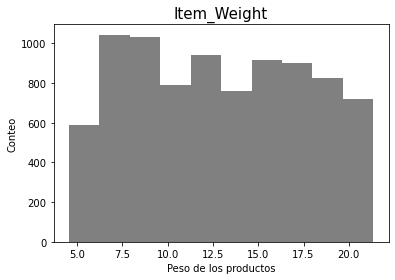

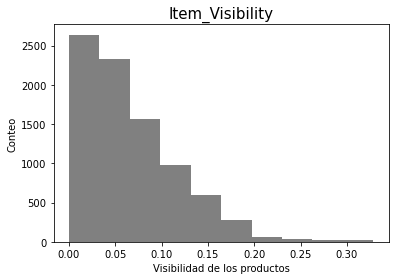

In [699]:
lista=["Item_Weight","Item_Visibility"]
lista2=["Peso de los productos","Visibilidad de los productos"]
for i in range(len(lista)):
    plt.hist(df[lista[i]], color="grey")
    plt.title(lista[i], fontsize=15)
    plt.ylabel("Conteo", fontsize=10)
    plt.xlabel(lista2[i],fontsize=10)
  
    plt.show()

## Distribución de los productos por grasa

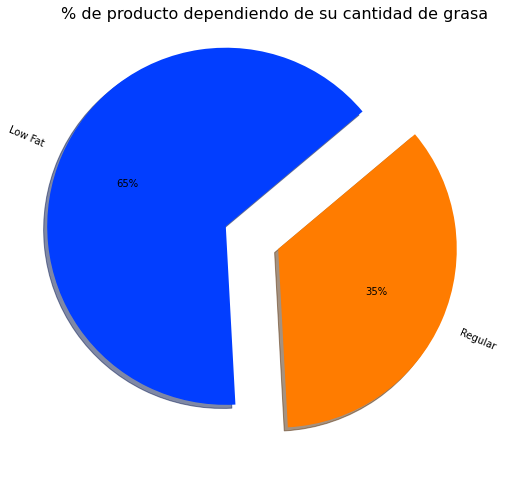

In [700]:
circular=pd.DataFrame(df["Item_Fat_Content"].value_counts())
colors = sbn.color_palette('bright')
explode = [0.3,0.02]
plt.figure(figsize=[8,12])
plt.pie(circular["Item_Fat_Content"], colors = colors, autopct = '%0.0f%%',explode = explode, labels=list(circular.index)
        ,shadow = 'True',rotatelabels = 'true',center = (0.1,0.4),startangle=40)
plt.title("% de producto dependiendo de su cantidad de grasa", fontsize=16)
plt.show()

## Cantidad de venta por año y tienda

In [701]:
barras=pd.DataFrame(df.groupby(["Outlet_Identifier"])["Item_Outlet_Sales"].sum())
barras

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.795736e+05
OUT027,3.444468e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


#### Obtengo la lista de colores

In [702]:
import matplotlib
listacolores=[]
for cname, hex in matplotlib.colors.cnames.items():
    listacolores.append(cname)


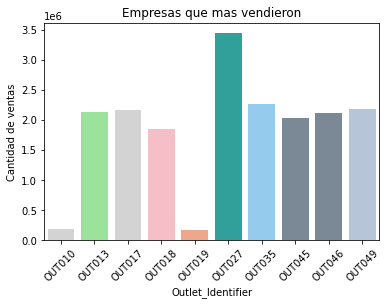

In [703]:
sbn.barplot(y=barras["Item_Outlet_Sales"],x=barras.index, palette=listacolores[71:81])
plt.xticks(rotation=45);
plt.title("Empresas que mas vendieron")
plt.ylabel("Cantidad de ventas")
plt.ticklabel_format(axis='y',useOffset=False)


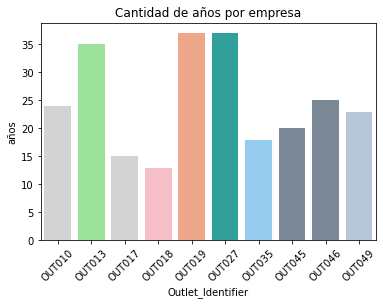

In [704]:
from datetime import datetime
años=df[['Outlet_Identifier',"Outlet_Establishment_Year"]].drop_duplicates()
años["Outlet_Establishment_Year"]=datetime.now().year-años["Outlet_Establishment_Year"]
años=años.sort_values("Outlet_Identifier")
sbn.barplot(y=años["Outlet_Establishment_Year"],x=años["Outlet_Identifier"],palette=listacolores[71:81])
plt.xticks(rotation=45);
plt.title("Cantidad de años por empresa")
plt.ylabel("años")
plt.ticklabel_format(axis='y',useOffset=False, style="plain")

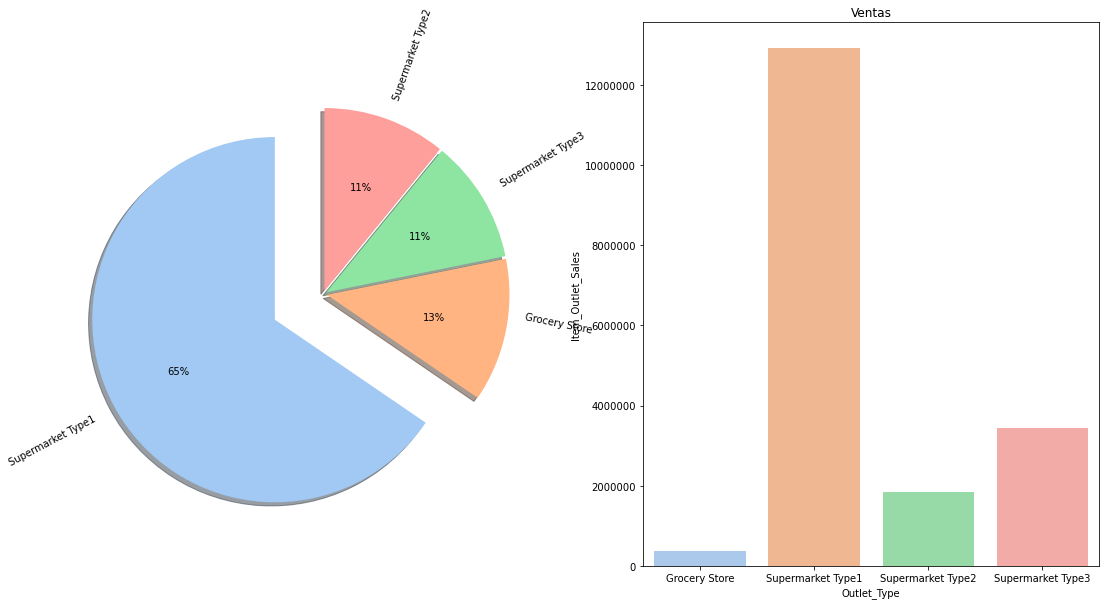

In [705]:
circular=pd.DataFrame(df["Outlet_Type"].value_counts())
colors = sbn.color_palette("pastel")
explode = [0.3,0.02,0.02,0.02]

fig, axes = plt.subplots(1, 2, figsize=(18, 10))


axes[0].pie(circular["Outlet_Type"], colors = colors, autopct = '%0.0f%%',explode = explode, labels=list(circular.index)
        ,shadow = 'True',rotatelabels = 'true',center = (0.1,0.4),startangle=90 );
sbn.barplot( ax=axes[1],x=tipotienda['Outlet_Type'], y=tipotienda['Item_Outlet_Sales'], orient="v",palette="pastel")
axes[1].yaxis.get_major_formatter().set_scientific(False)
axes[1].set_title("Ventas");




## Pormedio de venta por productos

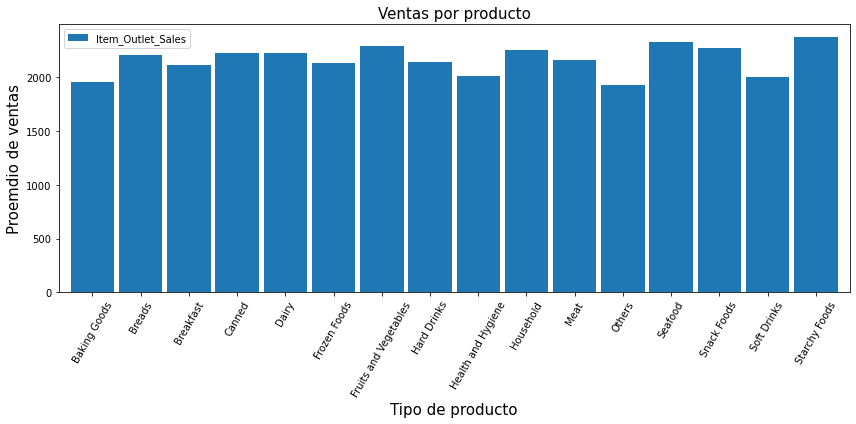

In [706]:
pd.DataFrame(df.groupby("Item_Type").mean()["Item_Outlet_Sales"]).plot(kind='bar', 
                    stacked=True,          
                    colormap= 'tab20',
                    figsize=(12, 6),mark_right = True,
                    legend=True, width=0.90 )
plt.title("Ventas por producto", fontsize=15)
plt.ylabel("Proemdio de ventas",fontsize=15)
plt.xlabel("Tipo de producto",fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show();


## Parte 4

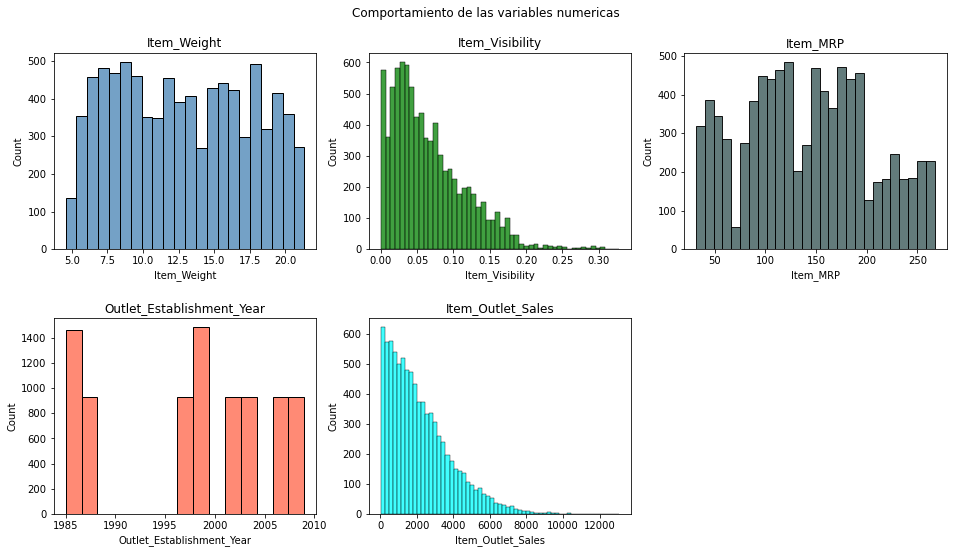

In [707]:
import random
fig, axes = plt.subplots(2, 3, sharex=False,sharey=False, figsize=(16,8))
fig.suptitle('Comportamiento de las variables numericas')

columna1=list(df.describe().columns)

p=0
for i in range(int(len(columna1)/2)):
    for y in range(int(len(columna1)/2)+1):
        plt.subplot(2,3,p+1)
        sbn.histplot(x=df[columna1[p]], color=random.choice(listacolores))
        plt.title(columna1[p])
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        p+=1
        if p==5:
          
            break
    if p==5:

        break
ax2 = plt.subplot(236, frameon=True)
plt.delaxes(ax2) 

plt.show()

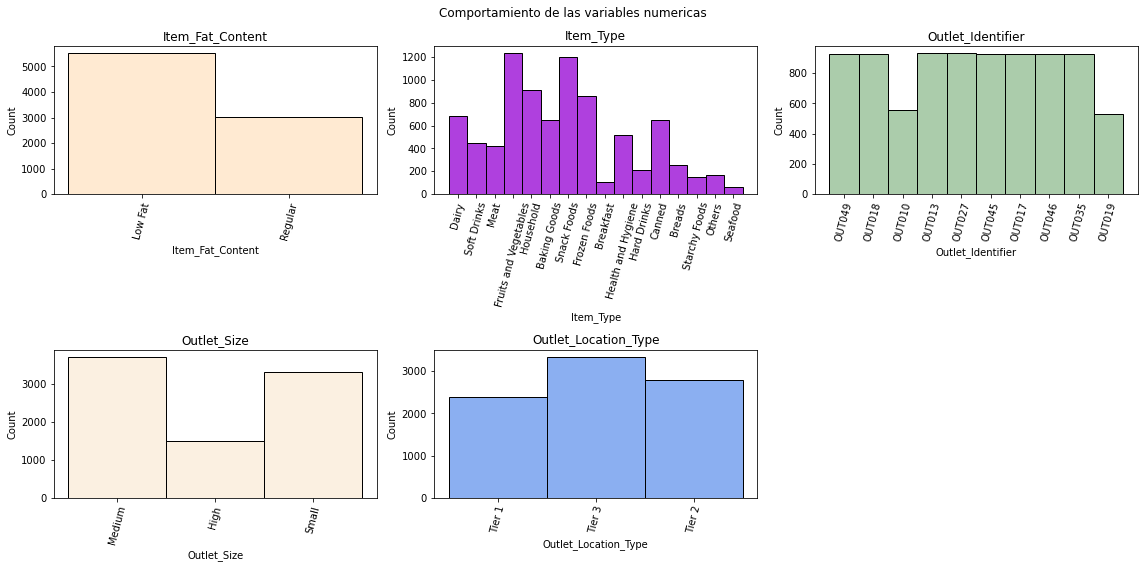

In [708]:
import random

fig, axes = plt.subplots(2, 3, sharex=False,sharey=False, figsize=(16,8))
fig.suptitle('Comportamiento de las variables numericas')

columna1=list(df.describe(include=object).iloc[:,1:].columns)

p=0
for i in range(int(len(columna1)/2)):
    for y in range(int(len(columna1)/2)+1):
        plt.subplot(2,3,p+1)
        sbn.histplot(x=df[columna1[p]],color=random.choice(listacolores) )
        plt.title(columna1[p])
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        plt.xticks(rotation=75)
        p+=1
        if p==5:
          
            break
    if p==5:

        break
ax2 = plt.subplot(236, frameon=True)
plt.delaxes(ax2) 
plt.tight_layout()

plt.show()

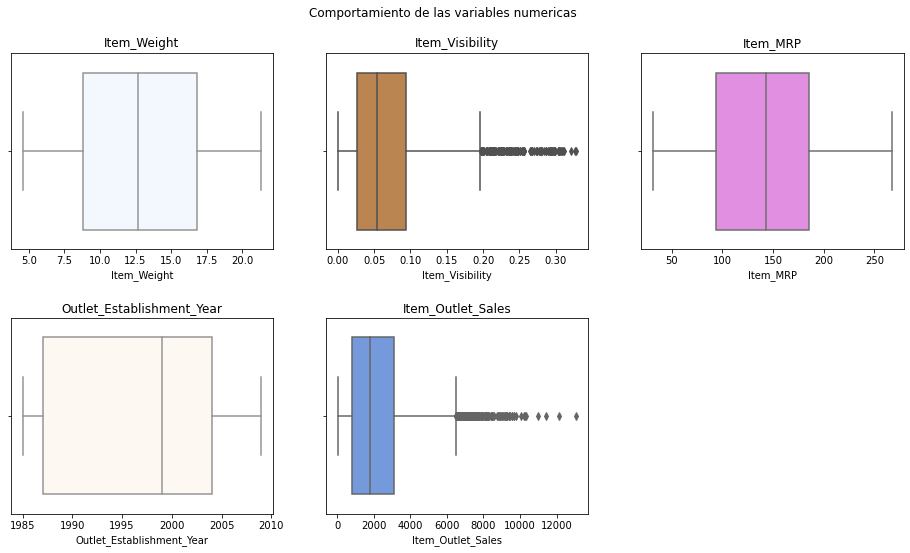

In [709]:
fig, axes = plt.subplots(2, 3, sharex=False,sharey=False, figsize=(16,8))
fig.suptitle('Comportamiento de las variables numericas')

columna1=list(df.describe().columns)

p=0
for i in range(int(len(columna1)/2)):
    for y in range(int(len(columna1)/2)+1):
        plt.subplot(2,3,p+1)
        sbn.boxplot(x=df[columna1[p]],color=random.choice(listacolores))
        plt.title(columna1[p])
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        p+=1
        if p==5:
          
            break
    if p==5:

        break
ax2 = plt.subplot(236, frameon=True)
plt.delaxes(ax2) 

plt.show()

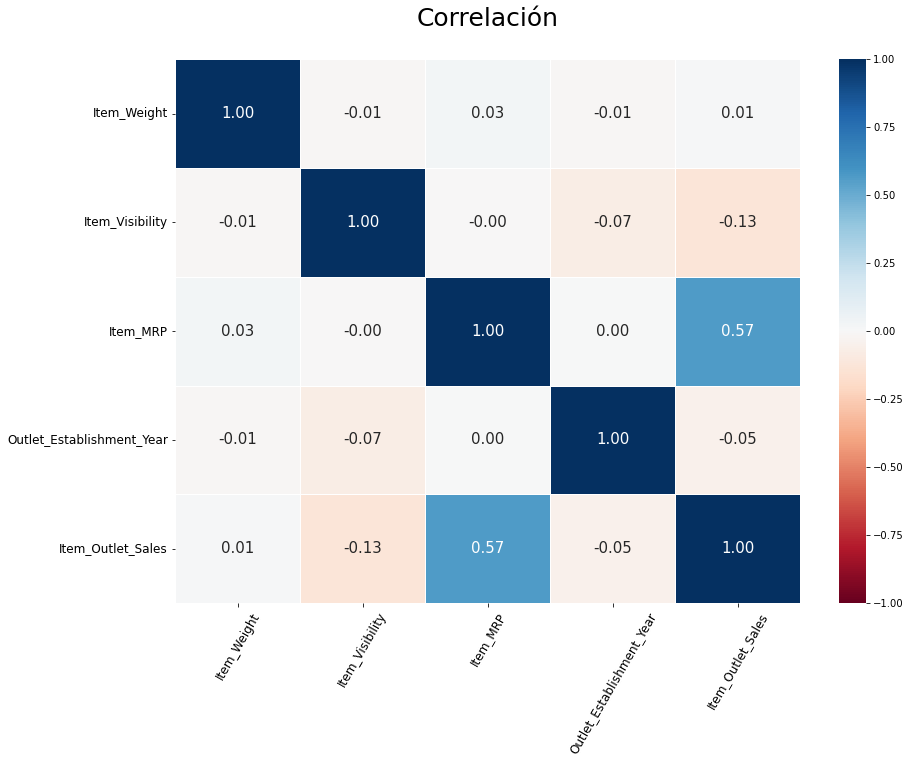

In [710]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,10))
plt.title('Correlación', y=1.05, size=25,)
sbn.heatmap(df.corr(),linewidths=0.5,vmin=-1,
             cmap=colormap, linecolor='white', annot=True,fmt='.2f',annot_kws={'size': 15})
plt.xticks(rotation=60)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

### Histograma de variables categoricas sin el identificador

In [711]:
colores=('Dark', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r')

# Parte 5 - Prediccciones de venta

###  5.1 Tranformar de variables categoria a numericas

In [712]:
df.nunique()

Item_Identifier              1555
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7876
Item_Type                      16
Item_MRP                     5936
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Outlet_Size2                    4
dtype: int64

In [713]:
grasa = { 'Low Fat' : 0, 
                  'Regular' : 1}
df['Item_Fat_Content'] = df['Item_Fat_Content'].map(grasa)


C:\Users\crist\AppData\Local\Temp/ipykernel_11412/2206724716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Fat_Content'] = df['Item_Fat_Content'].map(grasa)


In [714]:
locacion = { 'Tier 1' : 0, 
            'Tier 2' : 1,
           'Tier 3':2}
df["Outlet_Location_Type"] = df["Outlet_Location_Type"].map(locacion)


C:\Users\crist\AppData\Local\Temp/ipykernel_11412/3566551263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Location_Type"] = df["Outlet_Location_Type"].map(locacion)


In [715]:
tipo = { 'Grocery Store' : 0, 
            'Supermarket Type1' : 1,
           'Supermarket Type2':2,
           'Supermarket Type3':4}
df["Outlet_Type"] = df["Outlet_Type"].map(tipo)


C:\Users\crist\AppData\Local\Temp/ipykernel_11412/1327677827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Type"] = df["Outlet_Type"].map(tipo)


In [716]:
tipo = { 'Small' : 0, 
            'Medium' : 1,
           'High':2}
df["Outlet_Size2"] = df["Outlet_Size"].map(tipo)


C:\Users\crist\AppData\Local\Temp/ipykernel_11412/3837954333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outlet_Size2"] = df["Outlet_Size"].map(tipo)


# 5.2 Definir Matriz
Solo eligo las variables numericas, el id lo saco, al igual que el tipo de item y el identificador de la tienda

In [717]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [718]:
x=df[df.columns.difference(["Item_Outlet_Sales",'Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size'])].values
y=df["Item_Outlet_Sales"].values

## 5.3 Divido la data 70% y 30%

In [719]:
X_train, X_val, y_train, y_val = train_test_split(x, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)


## 5.4 escalo

In [720]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

## 5.5 Creo los modelos

In [721]:
reg=LinearRegression()
reg.fit(X_train, y_train)
print('Accuracy', reg.score(X_val, y_val))

Accuracy 0.5368404318892788


In [722]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train) 
print('Accuracy', knn.score(X_val, y_val))


Accuracy 0.5123711858255589


## 5.6 Optimizacion

### 5.6.1 Optimizacion regresion lineal

In [723]:
param_grid = [{'fit_intercept':[True,False],
               'normalize':[True,False],
               'copy_X':[True,False]
              }]

reg = LinearRegression()
grid_search = GridSearchCV(reg, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'copy_X': [True, False],
                          'fit_intercept': [True, False],
                          'normalize': [True, False]}],
             return_train_score=True)

In [724]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[ 0.49027722  0.49027722 -1.15859679 -1.15859679  0.49027722  0.49027722
 -1.15859679 -1.15859679] [{'copy_X': True, 'fit_intercept': True, 'normalize': True}, {'copy_X': True, 'fit_intercept': True, 'normalize': False}, {'copy_X': True, 'fit_intercept': False, 'normalize': True}, {'copy_X': True, 'fit_intercept': False, 'normalize': False}, {'copy_X': False, 'fit_intercept': True, 'normalize': True}, {'copy_X': False, 'fit_intercept': True, 'normalize': False}, {'copy_X': False, 'fit_intercept': False, 'normalize': True}, {'copy_X': False, 'fit_intercept': False, 'normalize': False}]


In [725]:
cvres1 = grid_search.best_params_
cvres2 = grid_search.best_score_
print(cvres1,cvres2)

{'copy_X': True, 'fit_intercept': True, 'normalize': True} 0.4902772211865784


### 5.6.2 Optimizacion vecino cercano 

In [726]:
param_grid = [{'n_neighbors':list(np.arange(1,50))
              }]

reg = KNeighborsRegressor()

grid_search = GridSearchCV(reg, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True)

In [727]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.19495923 0.38852248 0.46105878 0.49763815 0.51808191 0.53059071
 0.54222262 0.55016184 0.55162968 0.55545603 0.55921352 0.5631867
 0.5650428  0.56450144 0.56699586 0.56742854 0.56880916 0.56951582
 0.57031906 0.57178515 0.57121037 0.57159364 0.57226179 0.57319948
 0.57296556 0.57215331 0.57179234 0.571914   0.57118485 0.57090518
 0.56952741 0.56843966 0.56805837 0.56716977 0.56688737 0.56684913
 0.56634031 0.56613715 0.56559939 0.56505389 0.5642824  0.56400947
 0.5636402  0.56331937 0.56251937 0.56149851 0.5611839  0.56027845
 0.56013161] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}

In [728]:
cvres1 = grid_search.best_params_
cvres2 = grid_search.best_score_
print(cvres1,cvres2)

{'n_neighbors': 24} 0.5731994840773688


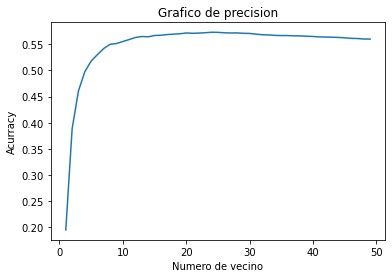

In [729]:
plt.plot(list(np.arange(1,50)), list(cvres['mean_test_score']));
plt.title("Grafico de precision")
plt.xlabel("Numero de vecino")
plt.ylabel("Acurracy");

## 5.7 Evaluamos el modelo

### 5.7.1 Modelo regresion lineal

In [730]:
reg = LinearRegression(copy_X=True, fit_intercept= True, normalize= False)
reg.fit(X_train, y_train)
print('Accuracy', reg.score(X_val, y_val))

Accuracy 0.5368404318892788


In [731]:
validacion_reg=reg.predict(X_test)

In [732]:
print(metrics.r2_score(y_test, validacion_reg))

0.46674780928907345


### 5.7.2 Modelo de vecino cercano

In [743]:
knn = KNeighborsRegressor(n_neighbors=24)
knn.fit(X_train, y_train)
print('Accuracy', knn.score(X_val, y_val))

Accuracy 0.5222519917659663


In [744]:
validacion_reg=knn.predict(X_test)

In [745]:
print(metrics.r2_score(y_test, validacion_reg))

0.5560229948221486


In [747]:
dfsinnulos

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size2
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,0,1,3735.1380,1
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,2,2,443.4228,1
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,0,1,2097.2700,1
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,2,1,994.7052,2
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,2,2,556.6088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,1,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,0,1,3608.6360,0
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,2,1,2778.3834,2
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,1,1,1193.1136,0
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,2,2,1845.5976,1


### ¿Hay algo que puedas hacer para mejorar el modelo?
Los modelos tienen precision baja, lo ideal seria robustecer el modelo el modelo con mayor cantidad de datos que sean mas representativ y mantiendo las clases de cada columna. Tambien se puede ver nuevo modelos que permite representar mejor forma el universo de datos

### ¿Qué características están más asociadas con la predicción de ventas mayores?

In [748]:
pd.DataFrame(df.corr()["Item_Outlet_Sales"]).sort_values("Item_Outlet_Sales", ascending=False).iloc[1:,:]

,Item_Outlet_Sales
Item_MRP,0.567803
Outlet_Type,0.392787
Outlet_Location_Type,0.089003
Item_Fat_Content,0.018974
Item_Weight,0.013168
Outlet_Size2,-0.040134
Outlet_Establishment_Year,-0.049083
Item_Visibility,-0.128297


**Segun la correlacion, a mayor venta esta asociada la columna MRP, que es el precio maximo del item y el tipo de supermercado, en cambio la visibilidad no tiene mucho peso en las ventas, incluso son inversamente proporcionales**

In [787]:
locacion = { 'Tier 1' : 0, 
            'Tier 2' : 1,
           'Tier 3':2}
dfsinnulos["Outlet_Location_Type"] = dfsinnulos["Outlet_Location_Type"].map(locacion)

grasa = { 'Low Fat' : 0, 
          'Regular' : 1}
dfsinnulos['Item_Fat_Content'] = dfsinnulos['Item_Fat_Content'].map(grasa)

tipo = { 'Grocery Store' : 0, 
            'Supermarket Type1' : 1,
           'Supermarket Type2':2,
           'Supermarket Type3':4}
dfsinnulos["Outlet_Type"] = dfsinnulos["Outlet_Type"].map(tipo)

tipo = { 'Small' : 0, 
            'Medium' : 1,
           'High':2}
dfsinnulos["Outlet_Size2"] = dfsinnulos["Outlet_Size"].map(tipo)


C:\Users\crist\AppData\Local\Temp/ipykernel_11412/10714947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsinnulos["Outlet_Location_Type"] = dfsinnulos["Outlet_Location_Type"].map(locacion)
C:\Users\crist\AppData\Local\Temp/ipykernel_11412/10714947.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsinnulos['Item_Fat_Content'] = dfsinnulos['Item_Fat_Content'].map(grasa)
C:\Users\crist\AppData\Local\Temp/ipykernel_11412/10714947.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [789]:
dfsinnulos.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Size2                 0
dtype: int64

In [790]:
x=dfsinnulos[dfsinnulos.columns.difference(["Item_Outlet_Sales",'Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size'])].values
y=dfsinnulos["Item_Outlet_Sales"].values

In [791]:
X_train, X_val, y_train, y_val = train_test_split(x, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

reg=LinearRegression()
reg.fit(X_train, y_train)
print('Accuracy', reg.score(X_val, y_val))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train) 
print('Accuracy', knn.score(X_val, y_val))


Accuracy 0.4712698495098525
Accuracy 0.4449165608899005


In [793]:
param_grid = [{'fit_intercept':[True,False],
               'normalize':[True,False],
               'copy_X':[True,False]
              }]

reg = LinearRegression()
grid_search = GridSearchCV(reg, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

cvres1 = grid_search.best_params_
cvres2 = grid_search.best_score_
print(cvres1,cvres2)

param_grid = [{'n_neighbors':list(np.arange(1,50))
              }]

reg = KNeighborsRegressor()

grid_search = GridSearchCV(reg, param_grid, cv=5,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

cvres1 = grid_search.best_params_
cvres2 = grid_search.best_score_
print(cvres1,cvres2)

{'copy_X': True, 'fit_intercept': True, 'normalize': True} 0.5003374276961298
{'n_neighbors': 22} 0.5675798168552844


In [794]:
reg = LinearRegression(copy_X=True, fit_intercept= True, normalize= False)
reg.fit(X_train, y_train)
print('Accuracy', reg.score(X_val, y_val))
validacion_reg=reg.predict(X_test)
print(metrics.r2_score(y_test, validacion_reg))

knn = KNeighborsRegressor(n_neighbors=22)
knn.fit(X_train, y_train)
print('Accuracy', knn.score(X_val, y_val))
validacion_reg=knn.predict(X_test)
print(metrics.r2_score(y_test, validacion_reg))

Accuracy 0.4712698495098525
0.498569491230467
Accuracy 0.5282646167844225
0.5586963325779513
